In [ ]:
%pip install wheel
%pip install pandas
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 10.4 MB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 1.7 MB/s eta 0:00:01


In [31]:
%pip install seaborn

     |████████████████████████████████| 215 kB 2.6 MB/s eta 0:00:01
  Using cached matplotlib-3.3.0-1-cp37-cp37m-macosx_10_9_x86_64.whl (11.4 MB)
     |████████████████████████████████| 28.7 MB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 7.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [54]:
%pip install sklearn

     |████████████████████████████████| 7.2 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 2.5 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=4e912877c56cb93851b7c02ff409ae172934dc92a31e110cf199e52a63ad639a
  Stored in directory: /Users/jose1/Library/Caches/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [64]:
%pip install pyod

     |████████████████████████████████| 93 kB 1.4 MB/s eta 0:00:011
     |████████████████████████████████| 2.0 MB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 9.4 MB/s eta 0:00:011
  Created wheel for pyod: filename=pyod-0.8.1-py3-none-any.whl size=105651 sha256=b93ab0023612263dbffe09347e06ba4c53b092e1e67739e2fbd4f3be3ed9327d
  Stored in directory: /Users/jose1/Library/Caches/pip/wheels/d6/f2/24/2c050361bd259bee34bbef8047bbcd3f08085f2a8a5ed1fc85
  Created wheel for combo: filename=combo-0.1.1-py3-none-any.whl size=42113 sha256=5420bf913cee7efee6cc22965237c0e37e589fd7ab1497d522ec1197990eda4e
  Stored in directory: /Users/jose1/Library/Caches/pip/wheels/3e/e1/f8/08f19ba48f75d3dbbb549cec4b86cc0392c14b2b6bb81f4e1f
  Created wheel for numba: filename=numba-0.50.1-cp37-cp37m-macosx_10_9_x86_64.whl size=2078665 sha256=a5beee552911fcaf66f054ec8190408f651e995a0409a513a81e89247a0c395f
  Stored in direct

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import copy
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import IsolationForest


In [3]:
import os
import pandas as pd
#datasets-13996-18858-WA_Fn-UseC_-Telco-Customer-Churn.csv.xls
#/Users/jose1/Library/Mobile Documents/com~apple~CloudDocs/Data Science/DataCamp 2020/Project 1 Churn analysis/datasets-13996-18858-WA_Fn-UseC_-Telco-Customer-Churn.csv.xls'
df= pd.read_csv('/Users/jose1/Library/Mobile Documents/com~apple~CloudDocs/Data Science/DataCamp 2020/Project 1 Churn analysis/datasets-13996-18858-WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
print(df.describe())
print(df.columns)
print(df.dtypes)
print(df.info())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
P

In [12]:
#Print the count of unique values for every column, regardless of data type.
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [17]:
#When working with categorical columns, it's really helpful to know what the unique codes are. For example, if you look at the Region or state column, youcan print out the different states in the dataframe.
#Hint: you can use the value_counts() method for this.
print(df.SeniorCitizen.value_counts())
print(df.PaymentMethod.value_counts())
print(df.Contract.value_counts())


0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


In [19]:
#Run the code below to print out the percent of each feature that is missing.
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


There are no missing values in the data set.

In [20]:
#Look for duplicate rows
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


There are no duplicate values in the database.

In [23]:
##PENDING: Convert all the variables to the right type.
## Convert To Categorical: SeniorCitizen
##Numerical variables:TotalCharges, Tenure(to float?)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
#df['TotalCharges'] = df['TotalCharges'].astype(float)
#df['tenure'] = df['tenure'].astype(float)
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [25]:
#Loop to convert columns to astype('category')
cols_to_exclude = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in df.columns:
    if df[col].nunique() < 5 and col not in cols_to_exclude:
        df[col] = df[col].astype('category')

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [27]:
#Print the range of values using the aggregate function.
df.agg([min, max]).T

,min,max
customerID,0002-ORFBO,9995-HOTOH
tenure,0,72
MonthlyCharges,18.25,118.75
TotalCharges,18.8,8684.8


In [28]:
#Review the numeric dataset's summary statistics.
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


For the TotalCharges vales, there may be some outliers. I need to further invertigate.

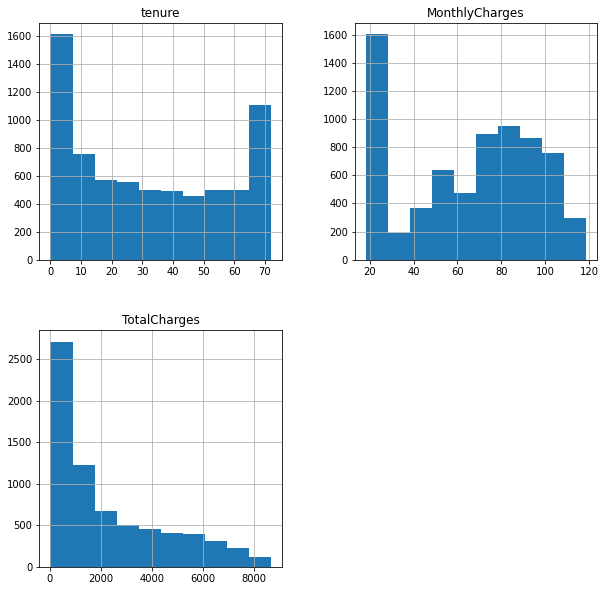

In [36]:
#summary stats table transposed for df
df.describe().T
#histograms for each variable in df
hist = df.hist(bins=10,figsize =(10,10))
#select categorical variables only
df_cat = df.select_dtypes(include = 'category').copy()


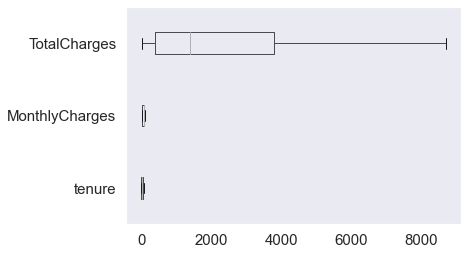

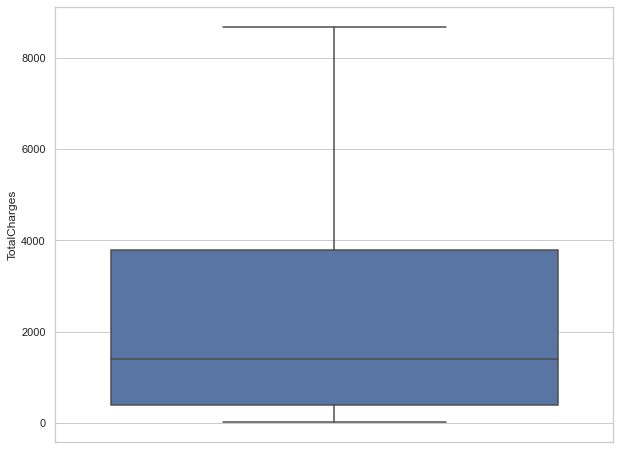

In [49]:
### Check for outliers
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=15)

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='TotalCharges', data=df, orient="v")

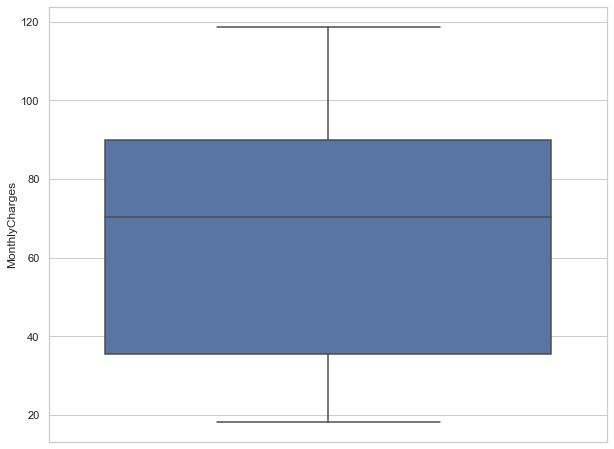

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='MonthlyCharges', data=df, orient="v")

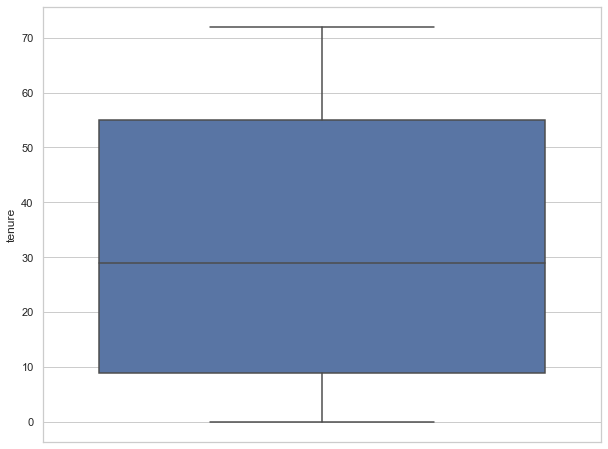

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='tenure', data=df, orient="v")

In [47]:
#sns.set(style='darkgrid')
#plt.figure(figsize=(20,10))
#ax = sns.countplot(x='Churn', data=df)

In [44]:
type_counts = df['Churn'].value_counts()
print(type_counts)

No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:ylabel='Client Churn'>

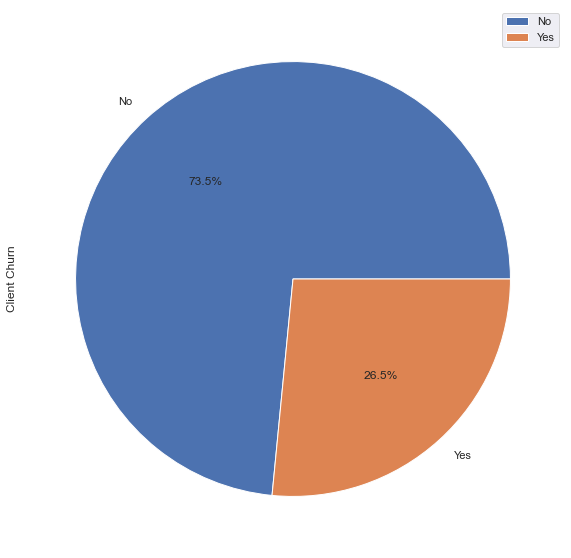

In [46]:
df2 = pd.DataFrame(
                    {'Client Churn': type_counts}, 
                   index = ['No', 'Yes']
                  )
df2.plot.pie(y='Client Churn', figsize=(10,10), autopct='%1.1f%%')

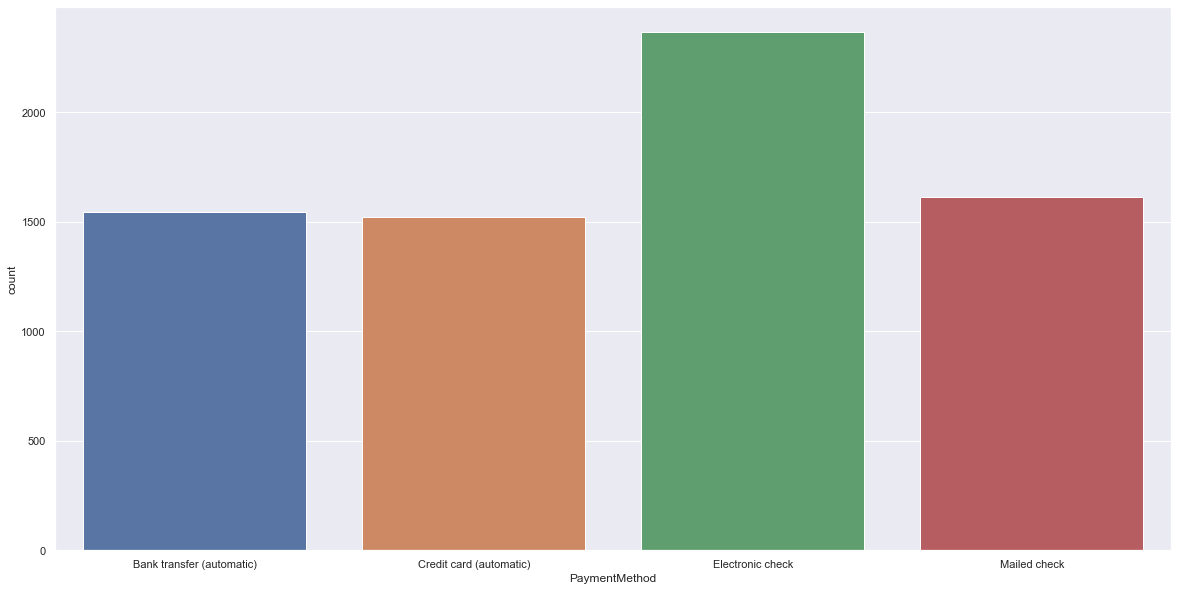

In [40]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='PaymentMethod', data=df)

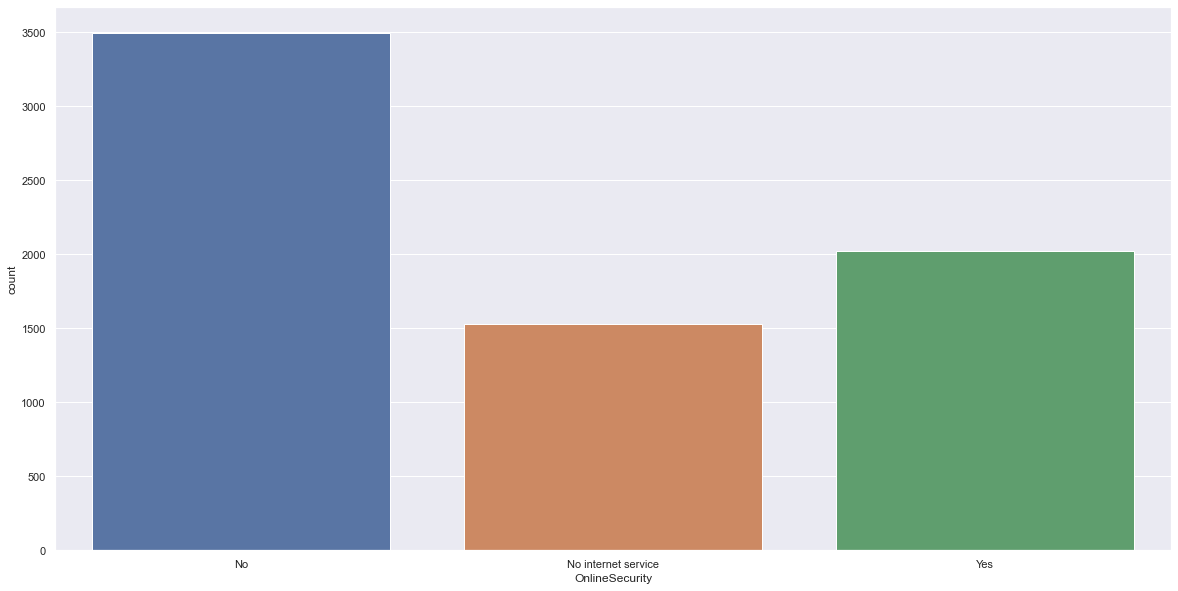

In [41]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='OnlineSecurity', data=df)


In [ ]:
#df2 = df_flights.select_dtypes(include=['object']).copy()

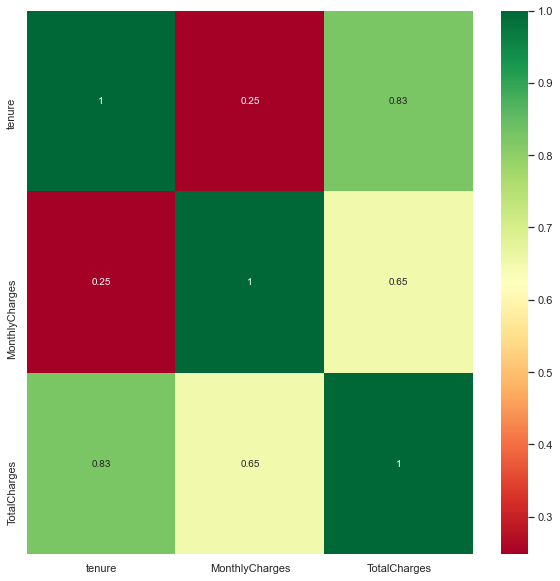

In [62]:
#Heat Map
heatmap = df.corr()
top_feat = heatmap.index
plt.figure(figsize=(10,10))
p = sns.heatmap(df[top_feat].corr(),annot=True,cmap ='RdYlGn')
#There is "high" correlation between tenure and Total Charges (0.83) ?Can I still use Local outlier Factor?

In [56]:
# split into input and output elements
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(7043, 19) (7043,)
(4718, 19) (2325, 19) (4718,) (2325,)


In [65]:
from pyod.models.abod import ABOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [66]:
clf = ABOD(method="fast")
clf.fit(X_train)

y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)
y_test_proba = clf.predict_proba(X_test)

evaluate_print("ABOD", y_test, y_test_scores)


visualize(y_test, y_test_scores)

ValueError: could not convert string to float: 'Female'

In [67]:
# identify outliers in the training dataset
#iso = IsolationForest(contamination=0.1)
#yhat = iso.fit_predict(X_train[])

In [ ]:
##?? Can you help me to figure out how to run the ABOD method when we have categorical variables?
